In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

读取clinical_data数据集

In [4]:
# 读取数据集
data = pd.read_csv('clinical_data.csv')

# 3.1 数据摘要和可视化


  在这个数据集中，'subjectid','caseend','anestart','aneend','opstart','opend','adm','dis','height','weight','bmi'等是数值属性，其他的asa','sex','emop','department','approach	','position','ane_type等标签均可以归类为标称属性。

In [25]:
#标称属性
nominal_attrs =['asa','sex','emop','department','approach','position','ane_type'] 
#数值属性
numeric_attrs=['subjectid','caseend','anestart','opstart','opend','height','weight','bmi']

In [9]:
    
def data_summary(data,nominal_attrs, numeric_attrs):
    """
    对数据集进行数据摘要
    :param data: 数据集
    """
    # 对标称属性进行频数统计并输出
    for col in nominal_attrs:
        freq = data[col].value_counts()
        print("标称属性 '{}' 的频数统计：\n{}".format(col, freq))
        print()
    
    # 对数值属性进行五数概括和缺失值统计并输出
    for col in numeric_attrs:
        if data[col].dtype=='object':
            da=data[col].astype('float32')
        
        print("数值属性 '{}' 的五数概括和缺失值统计：".format(col))
        count_null = data[col].isnull().sum()
        print("  均值：{:.2f}".format(data[col].mean()))
        print("  标准差：{:.2f}".format(data[col].std()))
        print("  最小值：{:.2f}".format(data[col].min()))
        print("  25% 分位数：{:.2f}".format(data[col].quantile(q=0.25)))
        print("  50% 分位数：{:.2f}".format(data[col].quantile(q=0.5)))
        print("  75% 分位数：{:.2f}".format(data[col].quantile(q=0.75)))
        print("  最大值：{:.2f}".format(data[col].max()))
        print("  缺失值个数：{}".format(count_null))
        print()
    


In [10]:
data_summary(data,nominal_attrs, numeric_attrs)

标称属性 'asa' 的频数统计：
2.0    3699
1.0    1792
3.0     703
4.0      48
6.0      13
Name: asa, dtype: int64

标称属性 'sex' 的频数统计：
M    3243
F    3145
Name: sex, dtype: int64

标称属性 'emop' 的频数统计：
0    5606
1     782
Name: emop, dtype: int64

标称属性 'department' 的频数统计：
General surgery     4930
Thoracic surgery    1111
Gynecology           230
Urology              117
Name: department, dtype: int64

标称属性 'approach' 的频数统计：
Open           3365
Videoscopic    2754
Robotic         269
Name: approach, dtype: int64

标称属性 'position' 的频数统计：
Supine                     3883
Lithotomy                   994
Left lateral decubitus      556
Right lateral decubitus     493
Prone                       148
Reverse Trendelenburg        74
Trendelenburg                35
Sitting                       5
Left kidney                   4
Right kidney                  2
Name: position, dtype: int64

标称属性 'ane_type' 的频数统计：
General            6043
Spinal              273
Sedationalgesia      72
Name: ane_type, dtype: int64

数

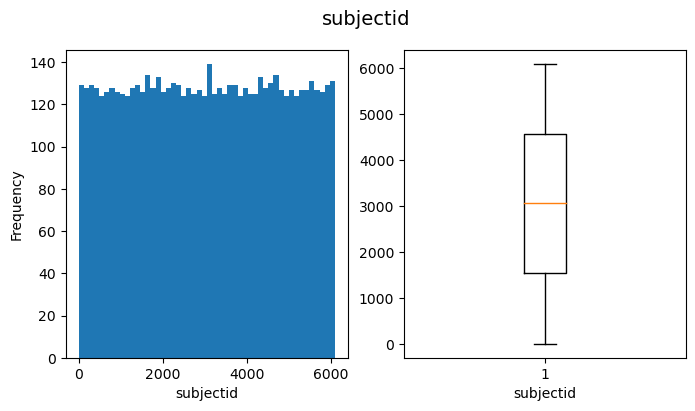

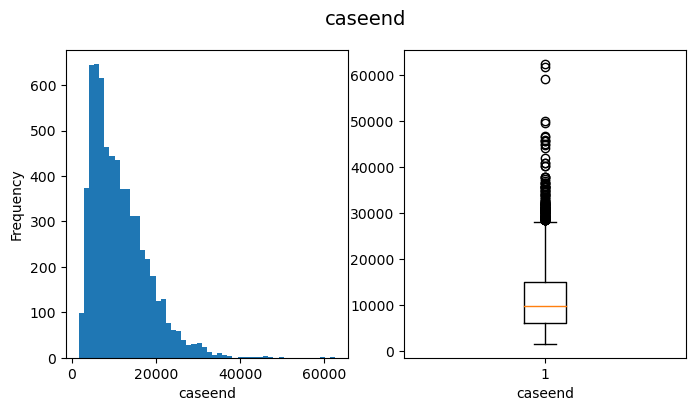

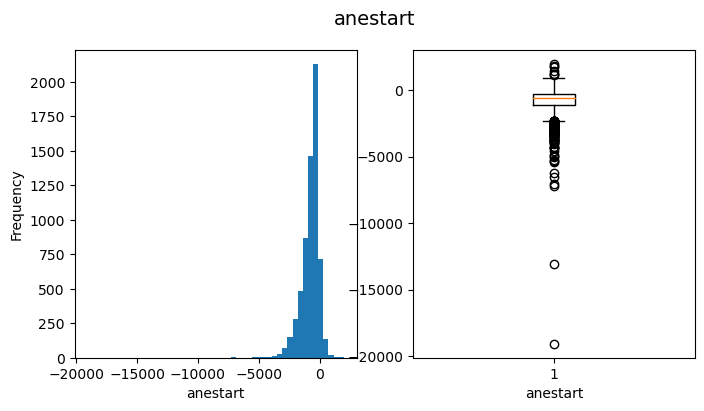

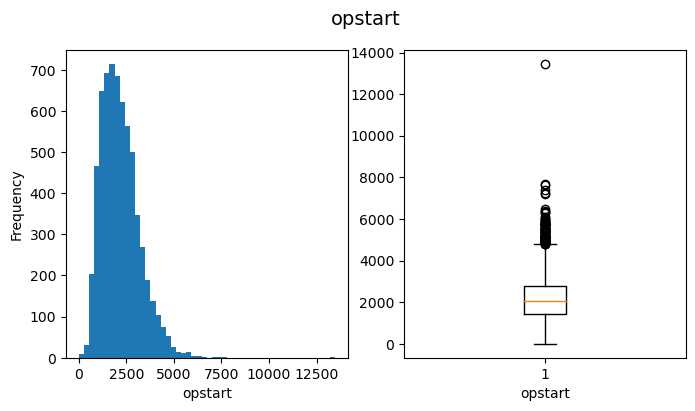

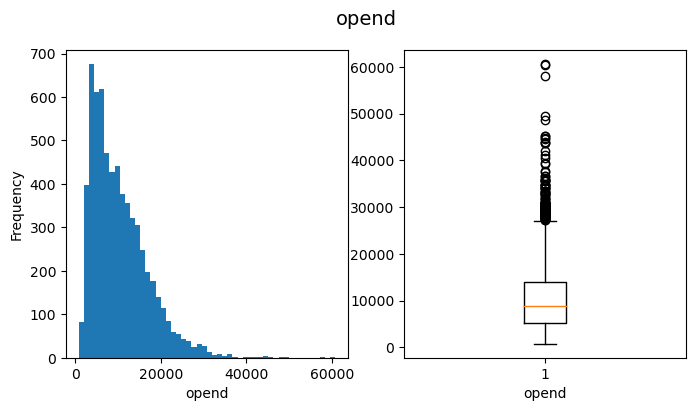

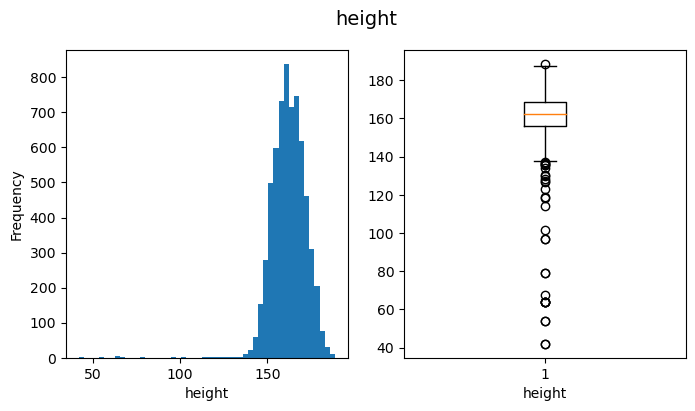

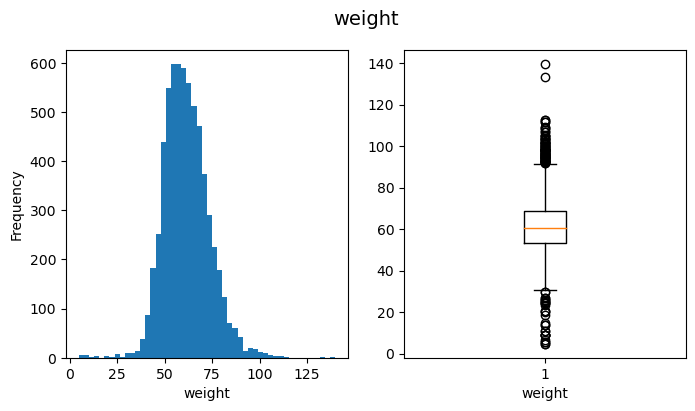

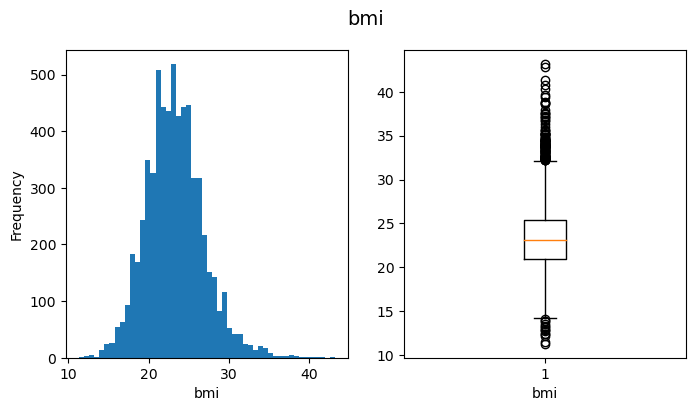

In [26]:
def data_visual(data,numeric_attrs): 
    # 对数值属性进行可视化分析
    for col in numeric_attrs:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
        fig.suptitle("{}".format(col), fontsize=14)
        axs[0].hist(data[col].dropna(),bins=50)
        axs[0].set_xlabel(col)
        axs[0].set_ylabel("Frequency")
        axs[1].boxplot(data[col].dropna())
        axs[1].set_xlabel(col)
        plt.show()
data_visual(data,numeric_attrs)

通过箱型图可以看出caseend anestart opstart opend 等数据都有较多的离群点。通过观察直方图，subjectid的数据更接近于均匀分布。'caseend','anestart','opstart','opend','height'等数据接近偏态分布。'weight','bmi'数据更接近于正态分布

# 3.2 数据缺失的处理

第一种方式是直接删除缺失值。这是最简单的处理方式，但它可能会减少我们数据集的规模。

In [27]:
data1=data.dropna()
print(" 原数据的大小：{}".format(data.shape ))
print("处理后数据的大小：{}".format(data1.shape))


 原数据的大小：(6388, 74)
处理后数据的大小：(0, 74)


剔除缺失值后数据直接被去除了，出现这种情况的原因可能是有某一列的数据全为空值，因此我们首先剔除缺失的列，再来进行缺失值的删除。

In [29]:
data=data.dropna(axis=1,how='all')
data1=data.dropna()
print(" 原数据的大小：{}".format(data.shape ))
print("处理后数据的大小：{}".format(data1.shape))


 原数据的大小：(6388, 74)
处理后数据的大小：(0, 74)


数据的缺失值太多，并不适合直接剔除的方式

第二种方式是用最高频率值来填补缺失值

In [31]:
freq = data.mode()
data2=data.fillna(freq, inplace=False)
print(" 原数据的大小：{}".format(data.shape ))
print("处理后数据的大小：{}".format(data2.shape))



 原数据的大小：(6388, 74)
处理后数据的大小：(6388, 74)


第三种是通过属性的相关关系来填补缺失值。只考虑单一变量缺失值插补是常见思路，但是单一的信息可能不够准确。考虑各属性的相关关系，我使用knn算法来进行数值属性的缺失值的填补。knn算法的全称是k-最近邻算法，它通过计算不同列之间的欧式距离，选择距离的最小值来完成填充

In [32]:
data_num=data[numeric_attrs]
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(data_num)


array([[ 5.9550e+03,  1.1542e+04, -5.5200e+02, ...,  1.6020e+02,
         6.7500e+01,  2.6300e+01],
       [ 2.4870e+03,  1.5741e+04, -1.0390e+03, ...,  1.6730e+02,
         5.4800e+01,  1.9600e+01],
       [ 2.8610e+03,  4.3940e+03, -5.9000e+02, ...,  1.6910e+02,
         6.9700e+01,  2.4400e+01],
       ...,
       [ 4.0450e+03,  1.9451e+04, -6.6700e+02, ...,  1.5170e+02,
         4.3250e+01,  1.8800e+01],
       [ 5.2300e+03,  1.2025e+04, -5.5000e+02, ...,  1.5570e+02,
         5.5500e+01,  2.2900e+01],
       [ 1.3060e+03,  1.0249e+04, -7.9000e+01, ...,  1.5000e+02,
         5.1500e+01,  2.2900e+01]])

第四种是通过数据对象之间的相似性来填补缺失值，使用随机森林模型进行填充。

In [38]:
data[numeric_attrs]

,subjectid,caseend,anestart,opstart,opend,height,weight,bmi
0,5955,11542,-552,1668,10368,160.2,67.50,26.3
1,2487,15741,-1039,1721,14621,167.3,54.80,19.6
2,2861,4394,-590,1090,3010,169.1,69.70,24.4
3,1903,20990,-778,2522,17822,160.6,53.00,20.5
4,4416,21531,-1009,2591,20291,171.0,59.70,20.4
...,...,...,...,...,...,...,...,...
6383,5583,15248,-260,2140,14140,161.5,63.00,24.2
6384,2278,20643,-544,2396,19496,159.3,62.30,24.6
6385,4045,19451,-667,3533,18233,151.7,43.25,18.8
6386,5230,12025,-550,1730,11030,155.7,55.50,22.9


In [36]:
# 准备需要的包
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
target = data['case_id']
X_full, y_full = data[numeric_attrs],target
n_samples = X_full.shape[0] # 样本
n_features = X_full.shape[1] # 特征
X_missing_reg = X_full.copy()
missing = X_missing_reg .isna().sum()
missing = pd.DataFrame(data={'特征': missing.index,'缺失值个数':missing.values})
missing = missing[~missing['缺失值个数'].isin([0])]
missing['缺失比例'] =  missing['缺失值个数']/X_missing_reg .shape[0]
X_df = X_missing_reg.isnull().sum()
colname = X_df[~X_df.isin([0])].sort_values().index.values
sortindex = []
for i in colname:
    sortindex.append(X_missing_reg.columns.tolist().index(str(i)))
# 遍历所有的属性，从缺失最少的开始进行填补，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填补下一个特征
for i in sortindex:
    df = X_missing_reg  
    fillc = df.iloc[:, i]
    df = pd.concat([df.drop(df.columns[i], axis=1), pd.DataFrame(y_full)], axis=1)
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
    Ytrain = fillc[fillc.notnull()]  
    Ytest = fillc[fillc.isnull()] 
    Xtrain = df_0[Ytrain.index, :]
    Xtest = df_0[Ytest.index, :] 
    rfc = RandomForestRegressor(n_estimators=100) 
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest) 
    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), X_missing_reg.columns[i]] = Ypredict

data_num=X_missing_reg

填充完的数据如下：

In [37]:
X_missing_reg

,subjectid,caseend,anestart,opstart,opend,height,weight,bmi
0,5955,11542,-552,1668,10368,160.2,67.50,26.3
1,2487,15741,-1039,1721,14621,167.3,54.80,19.6
2,2861,4394,-590,1090,3010,169.1,69.70,24.4
3,1903,20990,-778,2522,17822,160.6,53.00,20.5
4,4416,21531,-1009,2591,20291,171.0,59.70,20.4
...,...,...,...,...,...,...,...,...
6383,5583,15248,-260,2140,14140,161.5,63.00,24.2
6384,2278,20643,-544,2396,19496,159.3,62.30,24.6
6385,4045,19451,-667,3533,18233,151.7,43.25,18.8
6386,5230,12025,-550,1730,11030,155.7,55.50,22.9
